In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas-profiling

In [3]:
!pip install pandas-profiling==2.8.0

     |████████████████████████████████| 266kB 14.7MB/s 
     |████████████████████████████████| 1.1MB 40.8MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 3.2MB 52.1MB/s 
     |████████████████████████████████| 296kB 46.0MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=27d63c67ec85023be5f87187184e8d9a09908426dcaa2e8ab88a6fbb88a346c0
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=e119f1db64542466a7d40963a59fcccb7b604f6cf4764bfa17e48b4aead40da3
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing i

In [4]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     \ 38.4MB 2.1MB/s
     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=5ffb7598817fde070c721207efe5dc618546383a4270620c12269b939fbc3aae
  Stored in directory: /tmp/pip-ephem-wheel-cache-_xt0e26i/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: visions 0.4.4
    Uninstalling visions-0.4.4:
      Successfully uninstalled visions-0.4.4
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: pandas-profiling 2.8.0
    

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.decomposition import PCA
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import sklearn as sk
from pandas_profiling import ProfileReport
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [6]:

def get_categorical_numerical(d):
    column_list = d.columns
    numeric_col_df = pd.DataFrame()
    categorical_col_df = pd.DataFrame()
    datatype_list = []
    variableType_list = []
    j=""
    for i in ((d.dtypes)):
      #add regex here 
      # if i == 'float64':
      #   j = ('Numeric')
      if i == 'object' or i == 'bool':
        j = ('Categorical')
      else:
        j = ('Numeric')
      variableType_list.append((j))  
    categorical_index_list = []
    for i in range(len(variableType_list)):
      if variableType_list[i] == 'Categorical':
        categorical_col_df[column_list[i]] = d.iloc[:,i]
        categorical_index_list.append(i)
      if variableType_list[i] == 'Numeric':
        numeric_col_df[column_list[i]] = d.iloc[:,i]
      
    return categorical_index_list,categorical_col_df,numeric_col_df

In [7]:
def custom_imputer(d):
  cat_index,cat_df,num_df = get_categorical_numerical(d)
  
  cols = d.columns[cat_index]
  d[cols]=d[cols].fillna(d.mode().iloc[0])

  d_temp_true = pd.get_dummies(data=d, drop_first=True)

  a=IterativeImputer(Ridge())
  num_imputed = a.fit_transform(d_temp_true)
  num_imputed_df = pd.DataFrame(num_imputed, columns=d_temp_true.columns)

  num_imputed_df = num_imputed_df[num_df.columns]
  cat_imputed_df = d[cat_df.columns]
  imputed_df = pd.concat([num_imputed_df,cat_imputed_df],axis=1)
  return imputed_df


In [8]:
def plot_categorical_numerical(data_df):
  a4_dims = (48, 24)
  a,b,c = get_categorical_numerical(data_df)
  fig, axs = plt.subplots(ncols=len(c.columns), nrows=len(b.columns), figsize=a4_dims)
  for i in range(len(b.columns)):
    for j in range(len(c.columns)):
      if j==0:
        sns.boxplot(x=c.columns[j], y=b.columns[i], data=data_df, ax=axs[i][j])
      elif j!=0:
        g = sns.boxplot(x=c.columns[j], y=b.columns[i], data=data_df, ax=axs[i][j])
        g.set(yticklabels=[])
        g.set(ylabel=None)
  #fig.savefig("categorical_numerical.jpeg")
  plt.show()



In [9]:
def plot_graphs(data_df):
  cat_index,cat_df,num_df = get_categorical_numerical(data_df)
  sns.pairplot(num_df,height=4, aspect=4)
  plot_categorical_numerical(data_df) 
  #plt.savefig("numerical_numerical.jpeg") 
  plt.show()




In [10]:
def find_pca(data_df):
  cat_index,cat_df,num_df = get_categorical_numerical(data_df)
  pca = PCA(n_components=len(num_df.columns))
  pca.fit(num_df)
  print(pd.DataFrame(pca.explained_variance_ratio_,columns={"Percentage Variance"}))
  print("\n")
  #print(pd.DataFrame(pca.singular_values_, columns={"Variance Captured"}))
  PC_values = np.arange(pca.n_components_) + 1
  fig = plt.figure(figsize=(10,5))
  plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
  plt.title('Scree Plot')
  plt.xlabel('Principal Component')
  plt.ylabel('Proportion of Variance Explained')
  plt.show()

  val = {}
  sum = 0
  count_25 = 1
  count_50 = 1
  count_75 = 1
  k = 0
  for i in pca.explained_variance_ratio_:
    sum = sum + i
    val[k] = sum
    if sum <= 0.25:
      count_25 +=1
    if sum <= 0.5:
      count_50 +=1
    if sum <= 0.75:
      count_75 +=1
    k +=1
  test = []
  for i in val.values():
    test.append(float(i))
  # plotting code
  fig = plt.figure(figsize=(10,5))
  ax = fig.gca()
  plt.title('Cumulative Variance Scree Plot')
  ax.set_xlabel("K")
  ax.set_ylabel("Total Variance Explained")
  ax.plot(test,'ro-', linewidth=2)
  plt.show()

  print("The number of principal components required to reach 25% of total variance is ",count_25)
  print("The number of principal components required to reach 50% of total variance is ",count_50)
  print("The number of principal components required to reach 75% of total variance is ",count_75)


In [11]:
def profiler(data_df):
  a=pd.DataFrame(data_df)
  profile = ProfileReport(a, title="Pandas Profiling Report")
  profile.to_widgets()

In [ ]:
# import statsmodels.formula.api as smf
# import math

# def forward_selected(data, response):
#     from sklearn.model_selection import train_test_split
#     data_train,data_test = train_test_split(data, test_size=0.15, random_state=42)
#     remaining = set(data.columns)
#     remaining.remove(response)
#     selected = []
#     current_score, best_new_score = 0.0, 0.0
#     formula_list = []
#     rmse_list = []
#     formula_df = pd.DataFrame(columns=['Formula', 'RMSE score'])
#     while remaining and current_score == best_new_score:
#         scores_with_candidates = []
#         for candidate in remaining:
#             formula = "{} ~ {} + 1".format(response,' + '.join(selected + [candidate]))
#             formula1 = "{} ~ {}".format(response,' + '.join(selected + [candidate]))
#             #print(formula)
#             formula_list.append(formula1)
#             #formula_df['Formula']=(formula)

#             score = math.sqrt(smf.ols(formula, data).fit().mse_model)
#             #model_r = smf.ols(formula, data_train).fit()
#             #score = model_r.predict(data_test).mse_model
#             #formula_df['RMSE score']=(score)
#             rmse_list.append(score)

#             #print('R squared value for this formula :',score)
#             #print('\n')
#             scores_with_candidates.append((score, candidate))
#         scores_with_candidates.sort()
#         best_new_score, best_candidate = scores_with_candidates.pop()
#         if current_score < best_new_score:
#             remaining.remove(best_candidate)
#             selected.append(best_candidate)
#             current_score = best_new_score
#     formula = "{} ~ {} + 1".format(response,' + '.join(selected))
#     model = smf.ols(formula, data).fit()
#     formula_df['Formula'] = formula_list
#     formula_df['RMSE score']= rmse_list
#     print(pd.DataFrame(formula_df))
#     print("\n \n")
#     print('The final formula for the regression model is')
#     print(formula_df.iloc[-1])
#     #return formula_df

In [12]:
import statsmodels.formula.api as smf
import math

def forward_selected(data, response):
    from sklearn.model_selection import train_test_split
    data_train,data_test = train_test_split(data, test_size=0.15, random_state=42)
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    formula_list = []
    rmse_list = []
    formula_df = pd.DataFrame(columns=['Formula', 'RMSE score'])
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,' + '.join(selected + [candidate]))
            formula1 = "{} ~ {}".format(response,' + '.join(selected + [candidate]))
            #print(formula)
            formula_list.append(formula1)
            #formula_df['Formula']=(formula)

            score = math.sqrt(smf.ols(formula, data).fit().mse_model)
            #model_r = smf.ols(formula, data_train).fit()
            #score = model_r.predict(data_test).mse_model
            #formula_df['RMSE score']=(score)
            rmse_list.append(score)

            #print('R squared value for this formula :',score)
            #print('\n')
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,' + '.join(selected))
    model = smf.ols(formula, data).fit()
    formula_df['Formula'] = formula_list
    formula_df['RMSE score']= rmse_list
    print(pd.DataFrame(formula_df))
    print("\n \n")
    print('The final formula for the regression model is')
    print(formula_df.iloc[-1])
    #return formula_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import Dataset

In [13]:
#Churn_Modelling_df = pd.read_csv('/content/drive/MyDrive/NEU/IDMP project/Churn_Modelling.csv')  
housing_df = pd.read_csv('/content/drive/MyDrive/NEU/IDMP project/housing.csv')  
insurance_df = pd.read_csv('/content/drive/MyDrive/NEU/IDMP project/insurance.csv')  
#supermarket_sales_df = pd.read_csv('/content/drive/MyDrive/NEU/IDMP project/supermarket_sales - Sheet1.csv')  


In [14]:
iris = datasets.load_iris()
iris
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df = data1.rename(columns={"sepal length (cm)":"sepal_length", "sepal width (cm)":"sepal_width", "petal length (cm)":"petal_length", "petal width (cm)":"petal_width", "target":"target"})

## EDA Tool function
### Pass the dataframe and the response variable as parameters

In [15]:
def EDA_tool(dataset_df,response_variable):
  #Without imputation
  profiler(dataset_df)
  plot_graphs(dataset_df)
  
  #Impute values
  if (dataset_df.isna().sum().sum(axis=0)>0):
    print("\n")
    print("The new Dataframe after imputing NA values")
    imputed_df = custom_imputer(dataset_df)
    profiler(imputed_df)
    print("\n")
    print("PCA on the given Data")
    find_pca(imputed_df)
    print("\n")
    print("Linear Regression Model")
    forward_selected(imputed_df,response_variable)
  #plot_graphs(imputed_df)
  else:
    print("\n")
    print("PCA on the given Data")
    find_pca(dataset_df)
    print("\n")
    print("Linear Regression Model")
    forward_selected(dataset_df,response_variable)

## Execute the code using the EDA_tool(X,Y) command. Here X is the pandas data frame and Y is  the response variable.

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:433: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

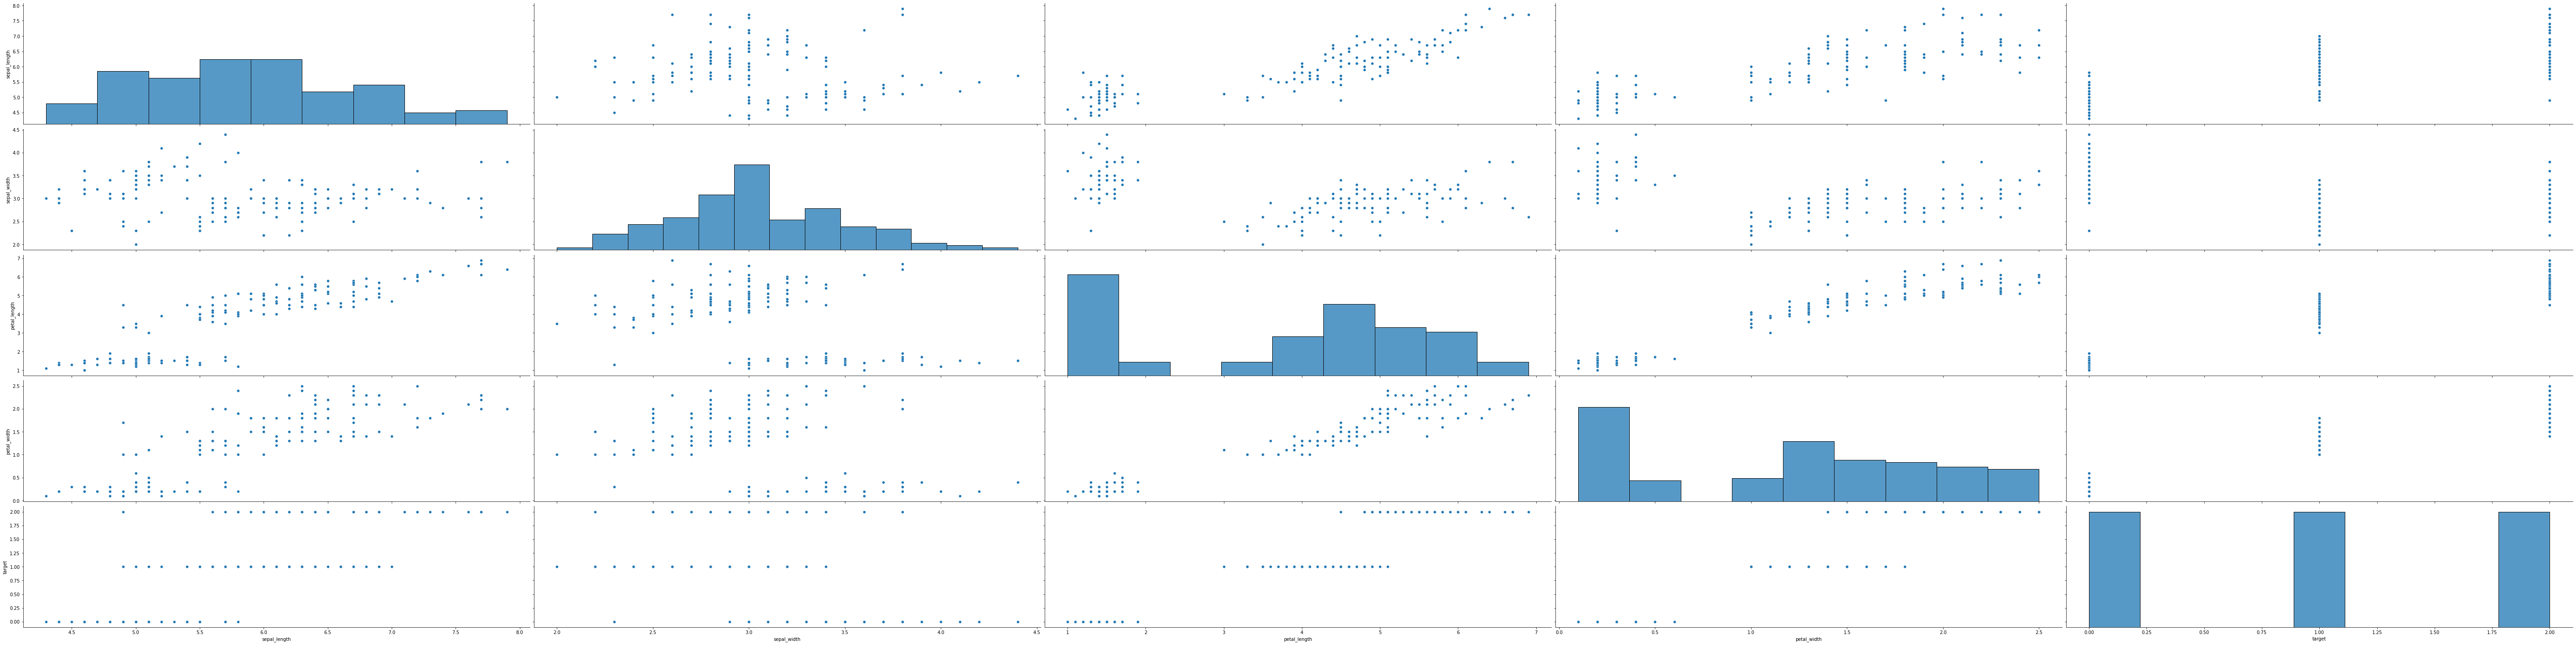

<Figure size 3456x1728 with 0 Axes>



PCA on the given Data
   Percentage Variance
0             0.922644
1             0.048128
2             0.018265
3             0.006990
4             0.003974




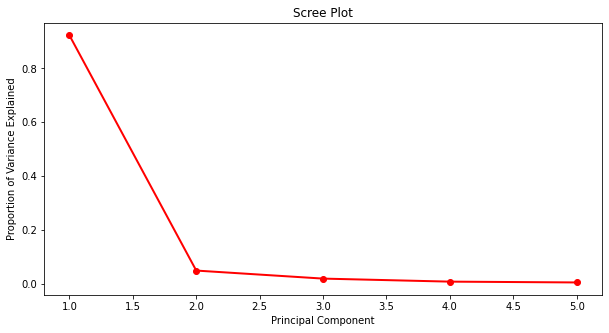

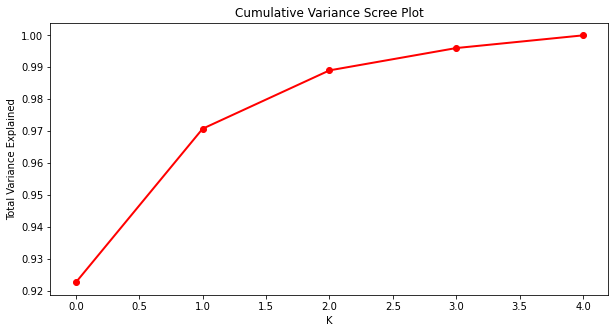

The number of principal components required to reach 25% of total variance is  1
The number of principal components required to reach 50% of total variance is  1
The number of principal components required to reach 75% of total variance is  1


Linear Regression Model
                                             Formula  RMSE score
0                               target ~ sepal_width    4.266576
1                              target ~ sepal_length    7.825612
2                              target ~ petal_length    9.490347
3                               target ~ petal_width    9.565473
4                target ~ sepal_width + sepal_length    6.024798
5                target ~ sepal_width + petal_length    6.712523
6                 target ~ sepal_width + petal_width    6.788706
7  target ~ sepal_width + sepal_length + petal_le...    5.508850
8  target ~ sepal_width + sepal_length + petal_width    5.545656

 

The final formula for the regression model is
Formula       target ~ sepal_wi

In [16]:
EDA_tool(iris_df,"target")

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:433: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

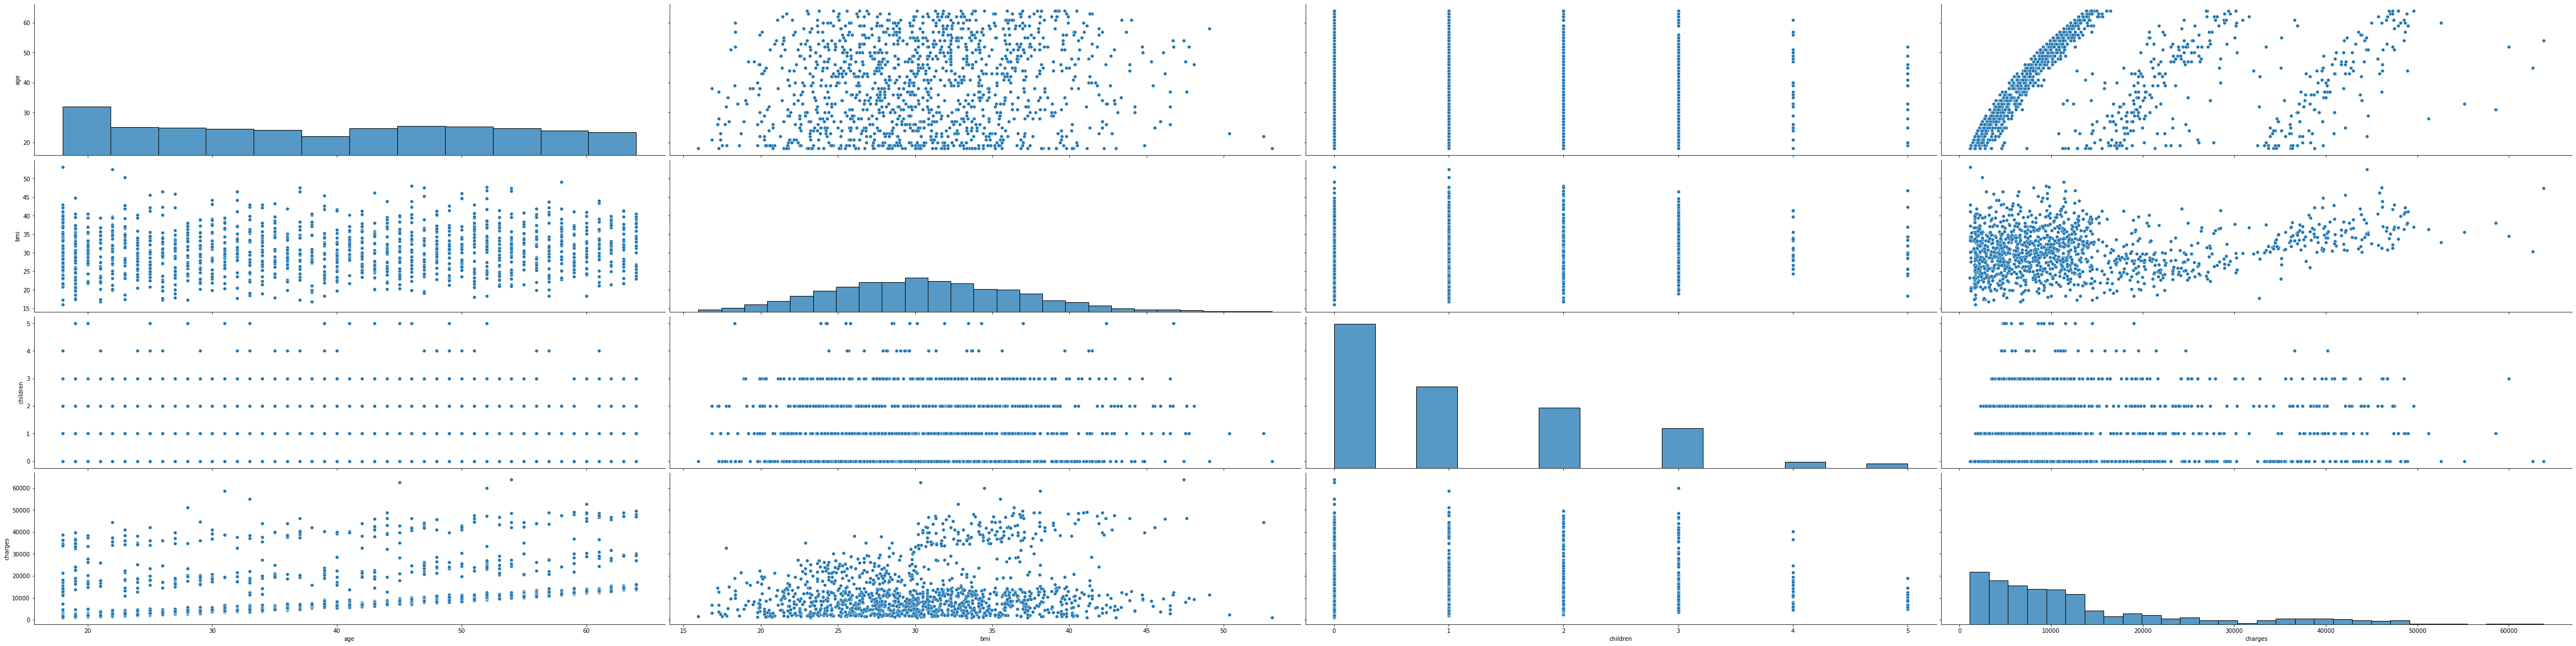

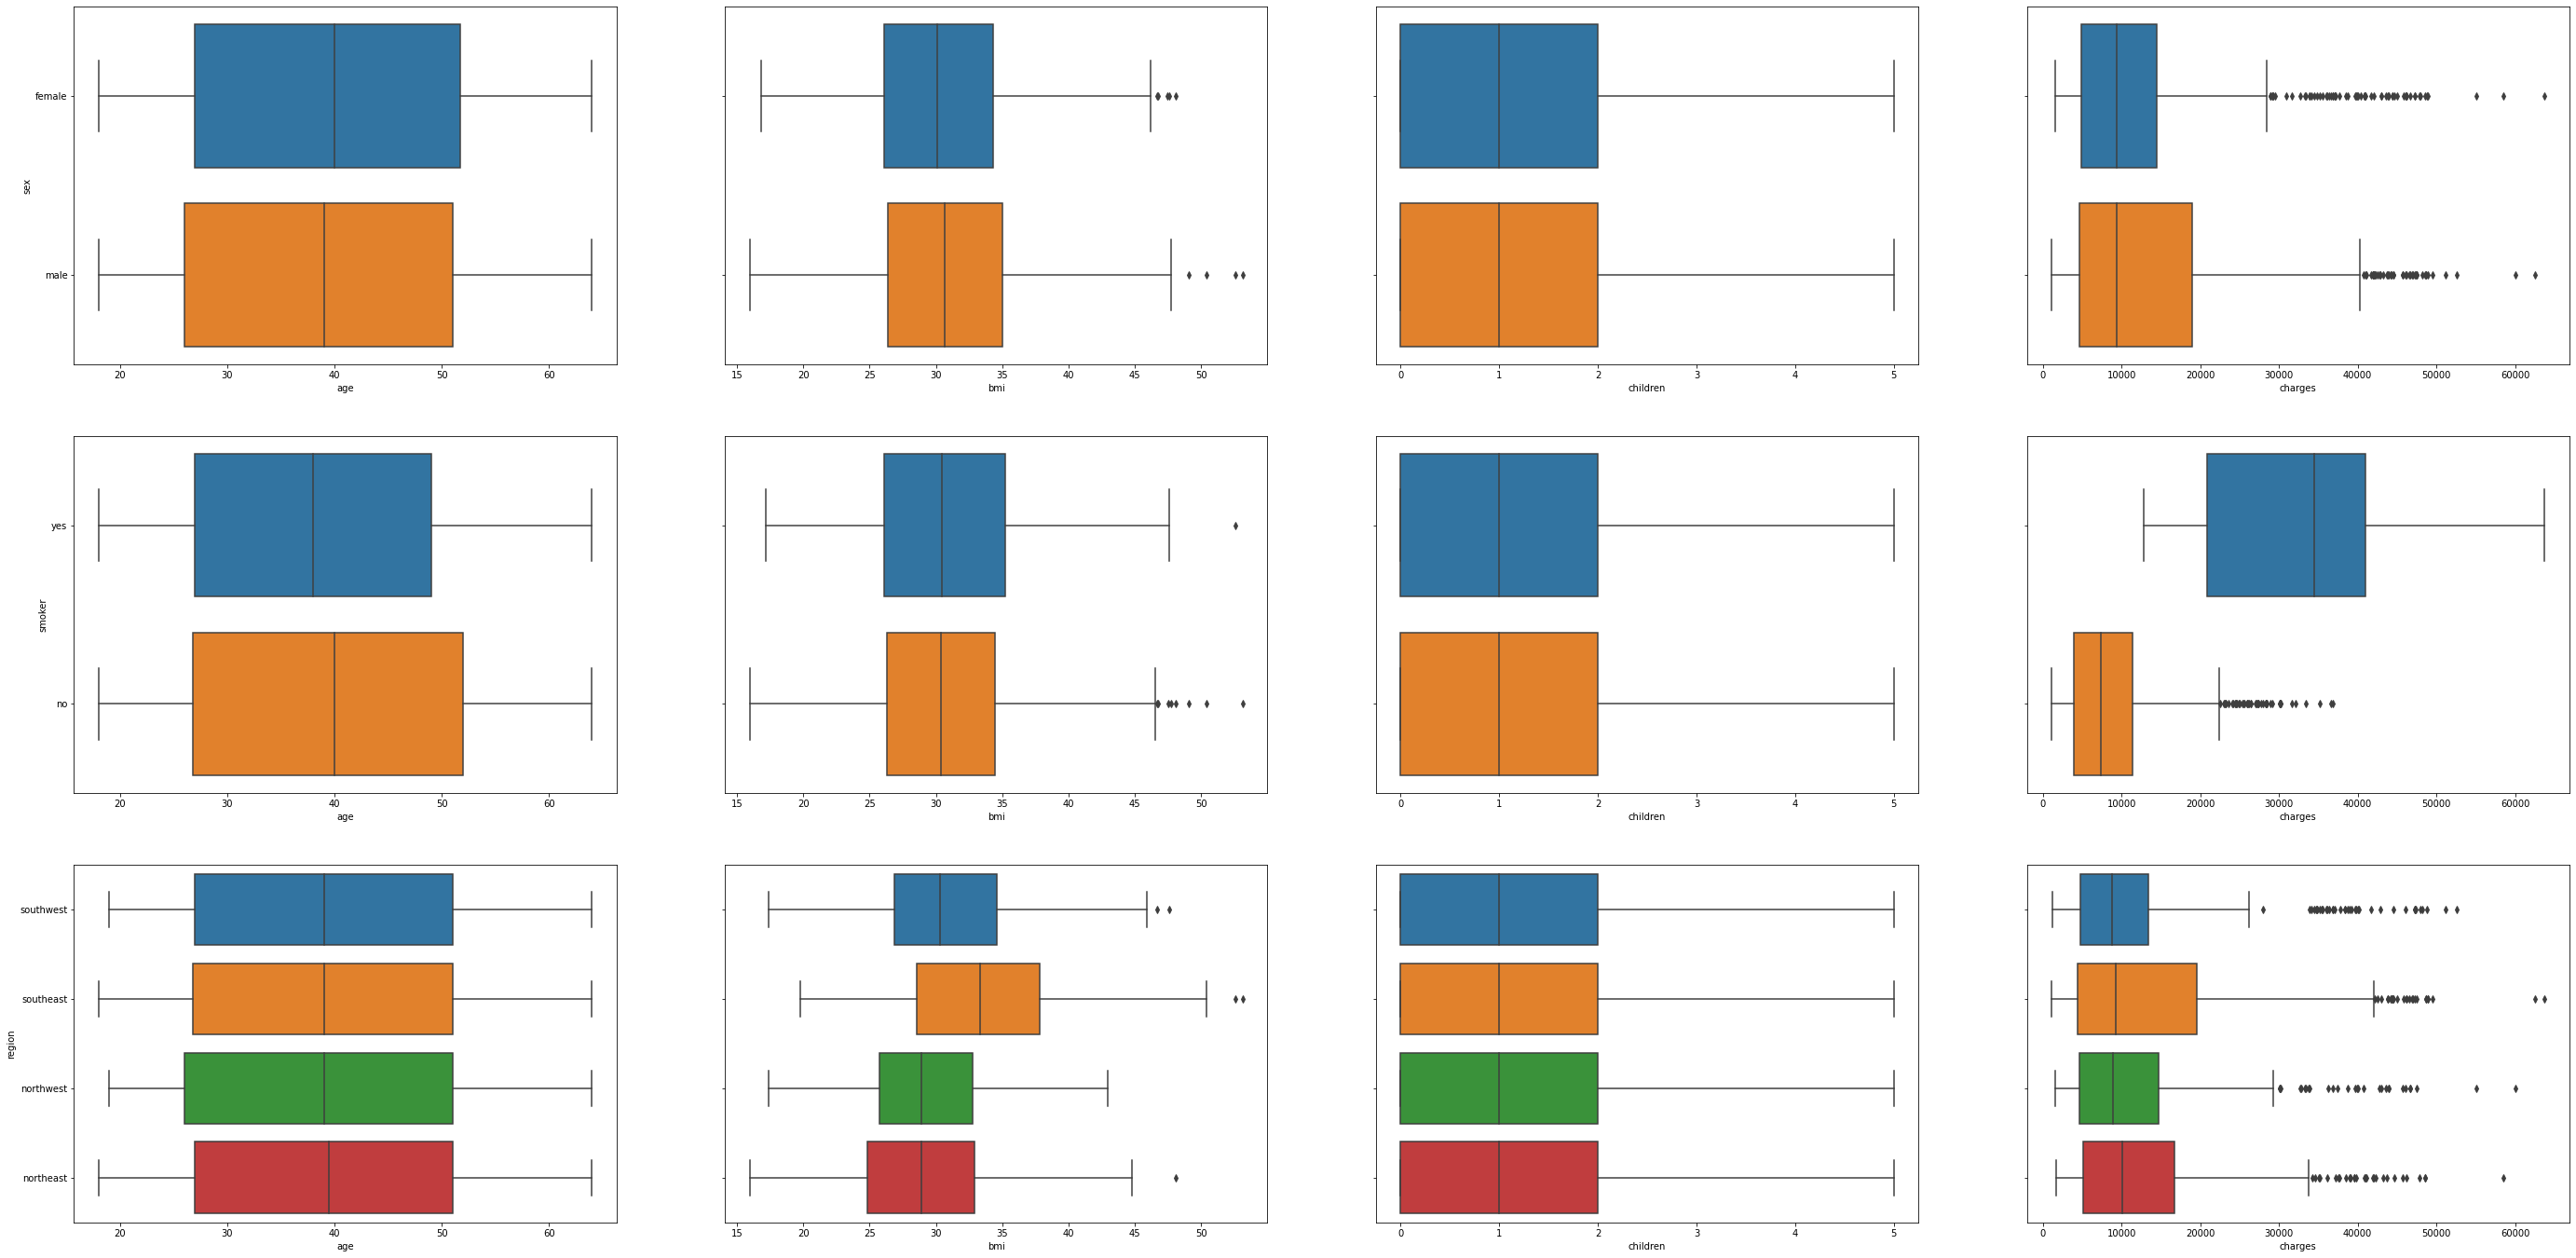



PCA on the given Data
   Percentage Variance
0         9.999985e-01
1         1.226575e-06
2         2.427356e-07
3         9.857984e-09




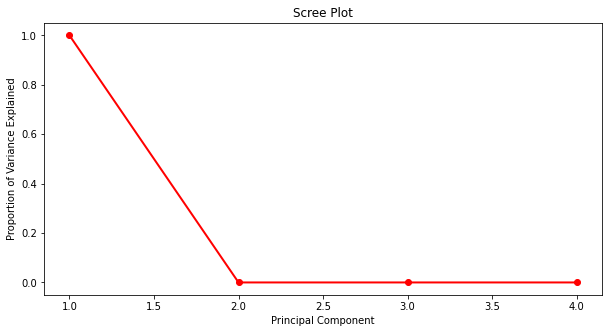

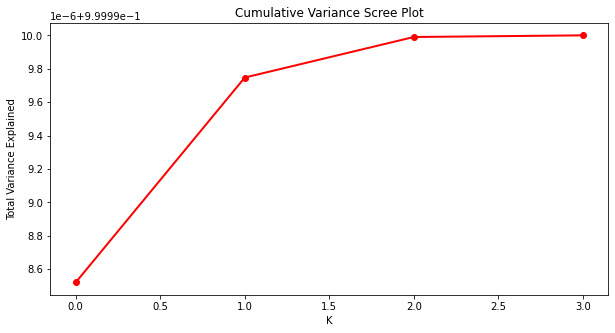

The number of principal components required to reach 25% of total variance is  1
The number of principal components required to reach 50% of total variance is  1
The number of principal components required to reach 75% of total variance is  1


Linear Regression Model
                                              Formula     RMSE score
0                                    charges ~ region   20822.741425
1                                    charges ~ smoker  348597.050506
2                                       charges ~ sex   25369.079213
3                                       charges ~ age  132401.632102
4                                  charges ~ children   30109.797710
5                                       charges ~ bmi   87825.914379
6                           charges ~ region + smoker  174375.619556
7                              charges ~ region + sex   21873.664805
8                              charges ~ region + age   68817.485220
9                         charges ~ regio

In [ ]:
EDA_tool(insurance_df,'charges')

In [ ]:
#EDA_tool(Churn_Modelling_df,'EstimatedSalary')

In [ ]:
#EDA_tool(housing_df,'median_house_value')

In [ ]:
#EDA_tool(supermarket_sales_df,'Unit price')